# **P1 Graded Challenge 4** 💎

## 1. INTRODUCTION 👋

*   Nama: Karel Gideon Anugrah Hutajulu
*   Batch: FTDS HCK-004


### A. Problem Statement

Buatlah model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dibawah ini. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir.

## 2.QUERY SQL

Before importing the dataset to the notebook we will filter the bigquery dataset using `sql` for the columns needed.

```sql
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_004_hck.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0;
```

## 3. IMPORT LIBRARIES 💽

In [3]:
import pandas as pd
import numpy as np

#----------------------------

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("husl")

#----------------------------

#feature engineering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

#VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#model
from sklearn.cluster import KMeans


#evaluasi
from sklearn.metrics import silhouette_score

#save model
import joblib

#Attach images to the google notebook
from IPython.display import Image

## 4. DATA LOADING 💽

In [84]:
df = pd.read_csv('/content/h8dsft_P1G4_Karel_Hutajulu.csv')

In [5]:
#Display top 10 rows of dataframe df
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [6]:
#Display top 10 rows of dataframe df
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


### Simple Data Understanding before we explore 🔍

In [7]:
df.dtypes

CUST_ID                               int64
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Now we verify all the column names

In [8]:
# Extract the column names using the .columns method
column_names = df.columns

# Print the column names
print(column_names)

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


and view how many rows of data do we have to work with.

In [9]:
df.shape

(4475, 18)

## 5. EXPLORATORY DATA ANALYSIS (EDA) 🎁

Before we dive into EDA its best for us to read and understand the definition of each columns.

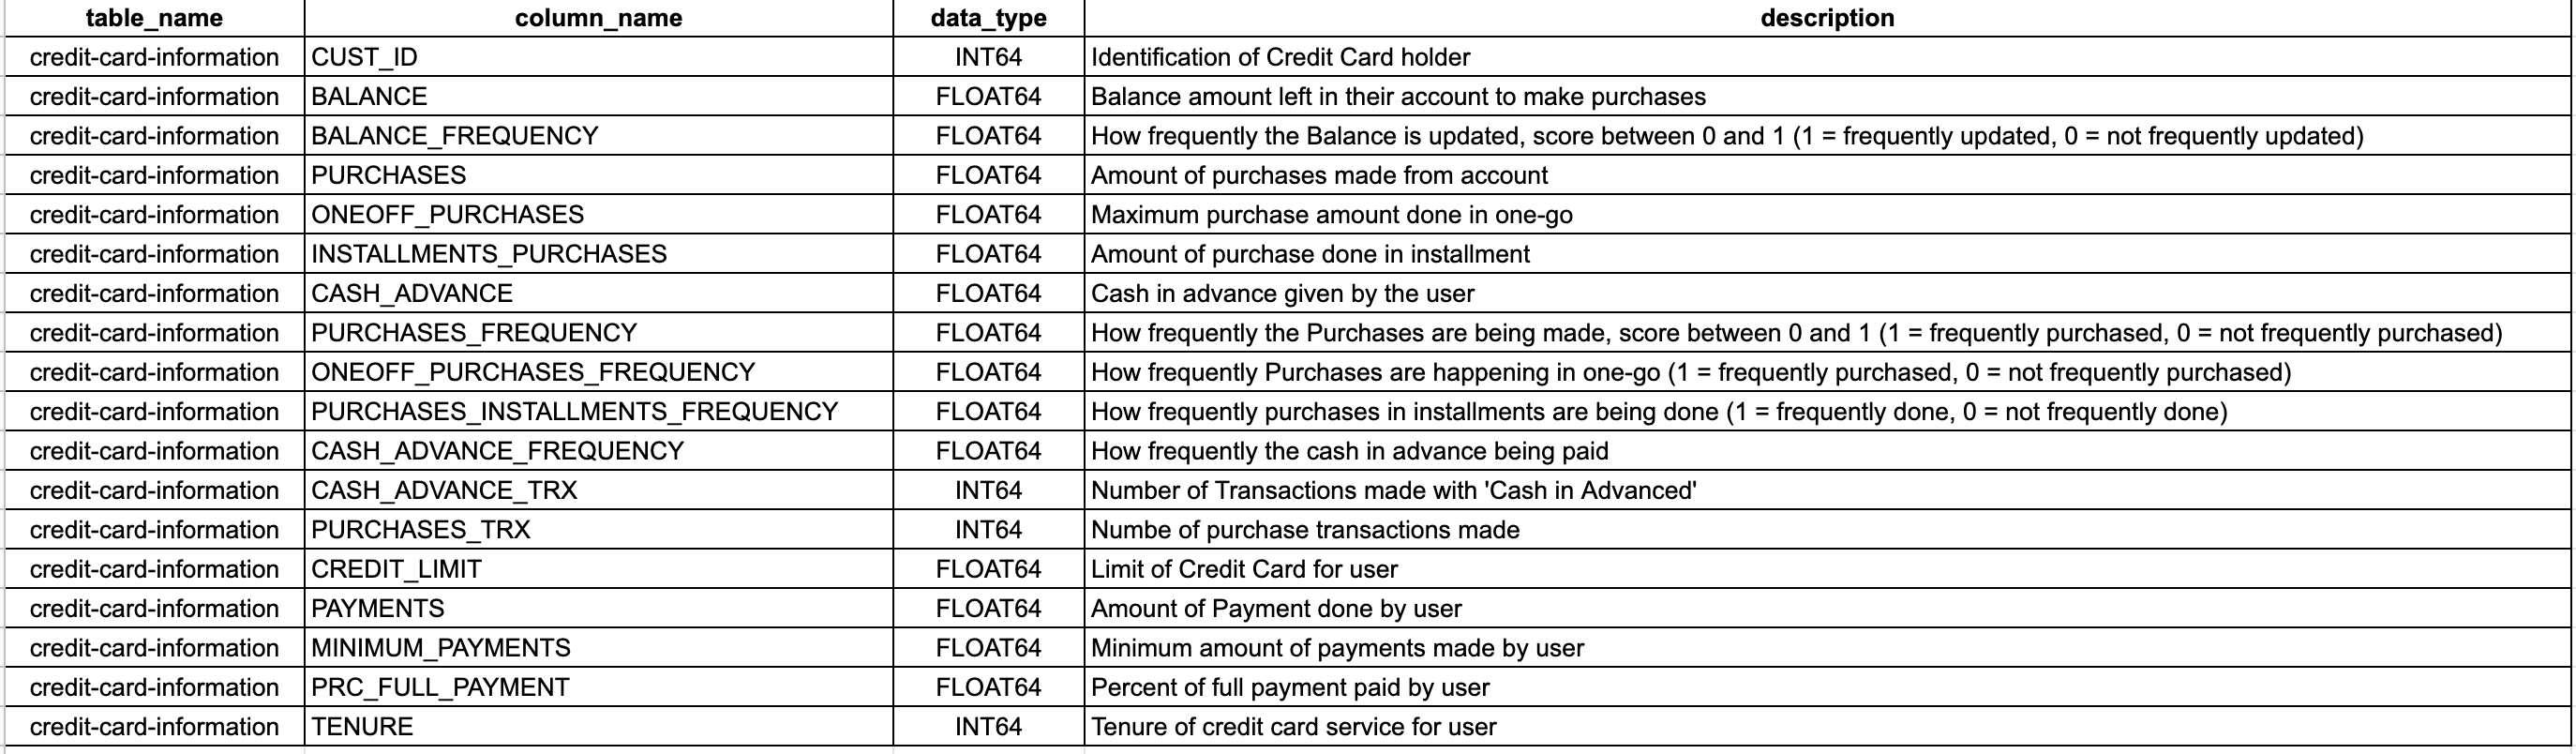

In [10]:
Image('/content/68747470733a2f2f692e6962622e636f2f32736266304a732f50312d47342d446174617365742d496e666f726d6174696f6e2e706e67.png')

### A. Descriptive Statistic

In [11]:
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4474.000000,4475.000000,4317.000000,4475.000000,4475.000000
mean,4476.000000,1565.743939,0.877608,1003.158324,588.504849,415.025075,973.453671,0.490122,0.202614,0.364989,0.134156,3.196425,14.490503,4494.020175,1726.212274,854.429538,0.157206,11.516425
std,2583.931114,2091.205727,0.235604,2210.812899,1666.500287,927.360842,2133.464502,0.399874,0.298502,0.397336,0.199221,6.500169,24.156038,3668.535689,2961.258570,2306.411178,0.295869,1.347819
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,2239.000000,132.536353,0.888889,40.065000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.206371,169.814310,0.000000,12.000000
50%,4476.000000,874.905296,1.000000,362.480000,29.990000,89.450000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,831.048408,309.854995,0.000000,12.000000
75%,6713.000000,2058.519163,1.000000,1122.640000,580.320000,484.255000,1098.569962,0.916667,0.333333,0.750000,0.181818,4.000000,17.000000,6000.000000,1895.959003,830.395060,0.166667,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


**Insight:**
- The dataset contains `4475 customers`.
- The` BALANCE` has a wide range, with a large standard deviation, indicating that there may be some customers with very high balances, and some with very low balances.
- The `BALANCE_FREQUENCY` is relatively high, with a mean of 0.88, which means that most customers pay their balance almost every month.
- The `PURCHASES` has a wide range, with a large standard deviation, indicating that there may be some customers who make very large purchases, and some who

### B. Univariate Analysis

 Continous Numerical Variables Distribution:

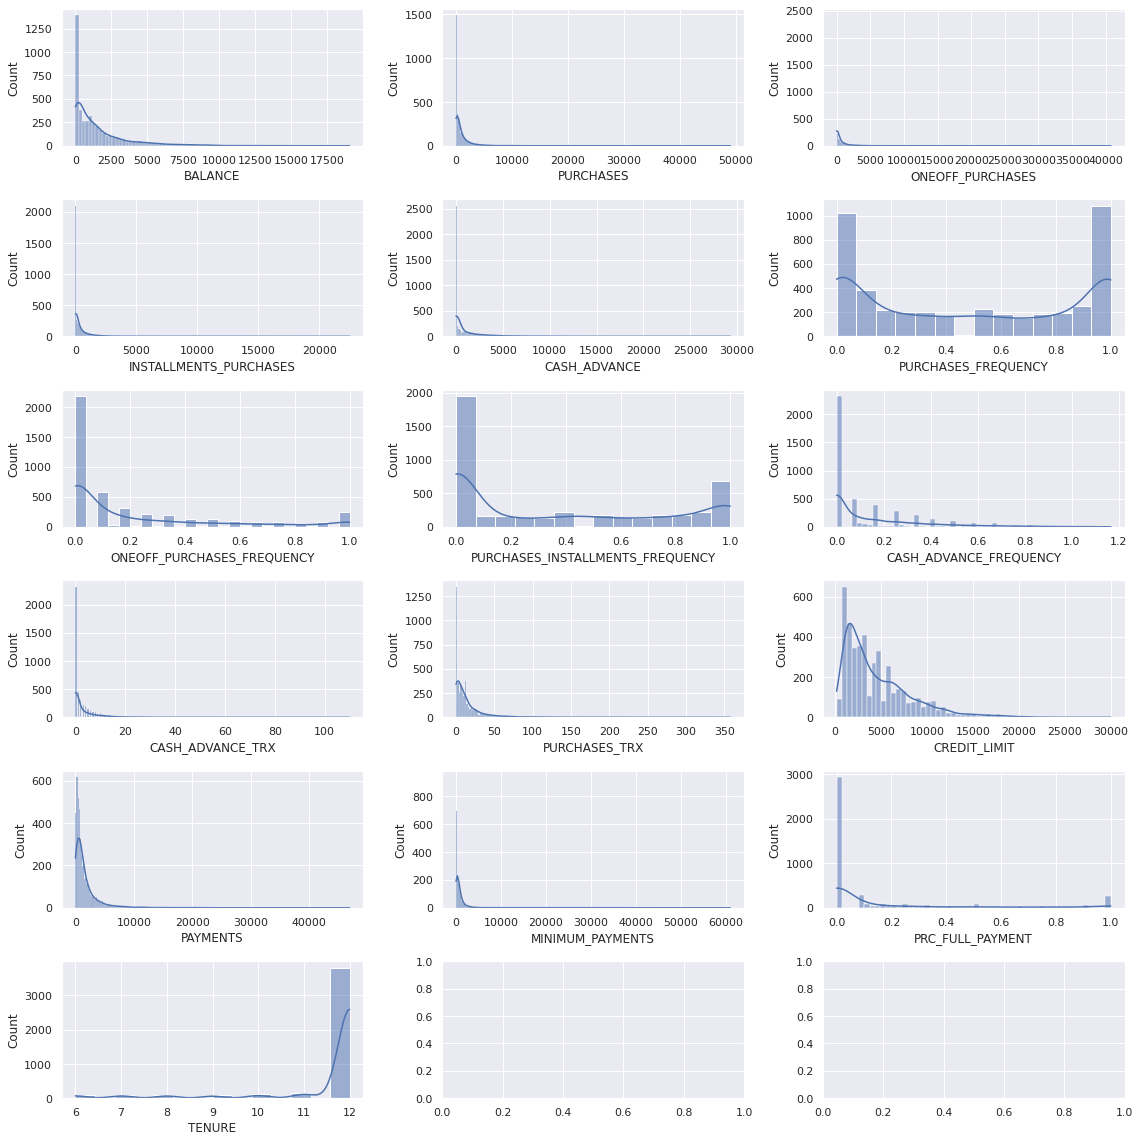

In [12]:
# set the list of numerical columns
n_val = ['BALANCE',  'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
         'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
         'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 
         'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# set the figure size
sns.set(rc={'figure.figsize':(16,16)})

# create subplots
fig, axes = plt.subplots(nrows=6, ncols=3)

# plot each histogram in the corresponding subplot
for i, column in enumerate(n_val):
    sns.histplot(df[column], kde=True, ax=axes[i//3, i%3])

plt.tight_layout()
plt.show()


**Observation:** 


- Credit_limit is right skewed, there are more people with lower credit limit compared to higher
- Tenure is heavily left skewed meaning more people have a 12 month tenure compared to others.
- Payment is also heavily right skewed meaning more people make lower payments
- Purchase Frequency has a 'm' shaped distribution meaning that most people either make very high amount of purchase or very low.
 

Now lets plot a boxplot to see the outliers

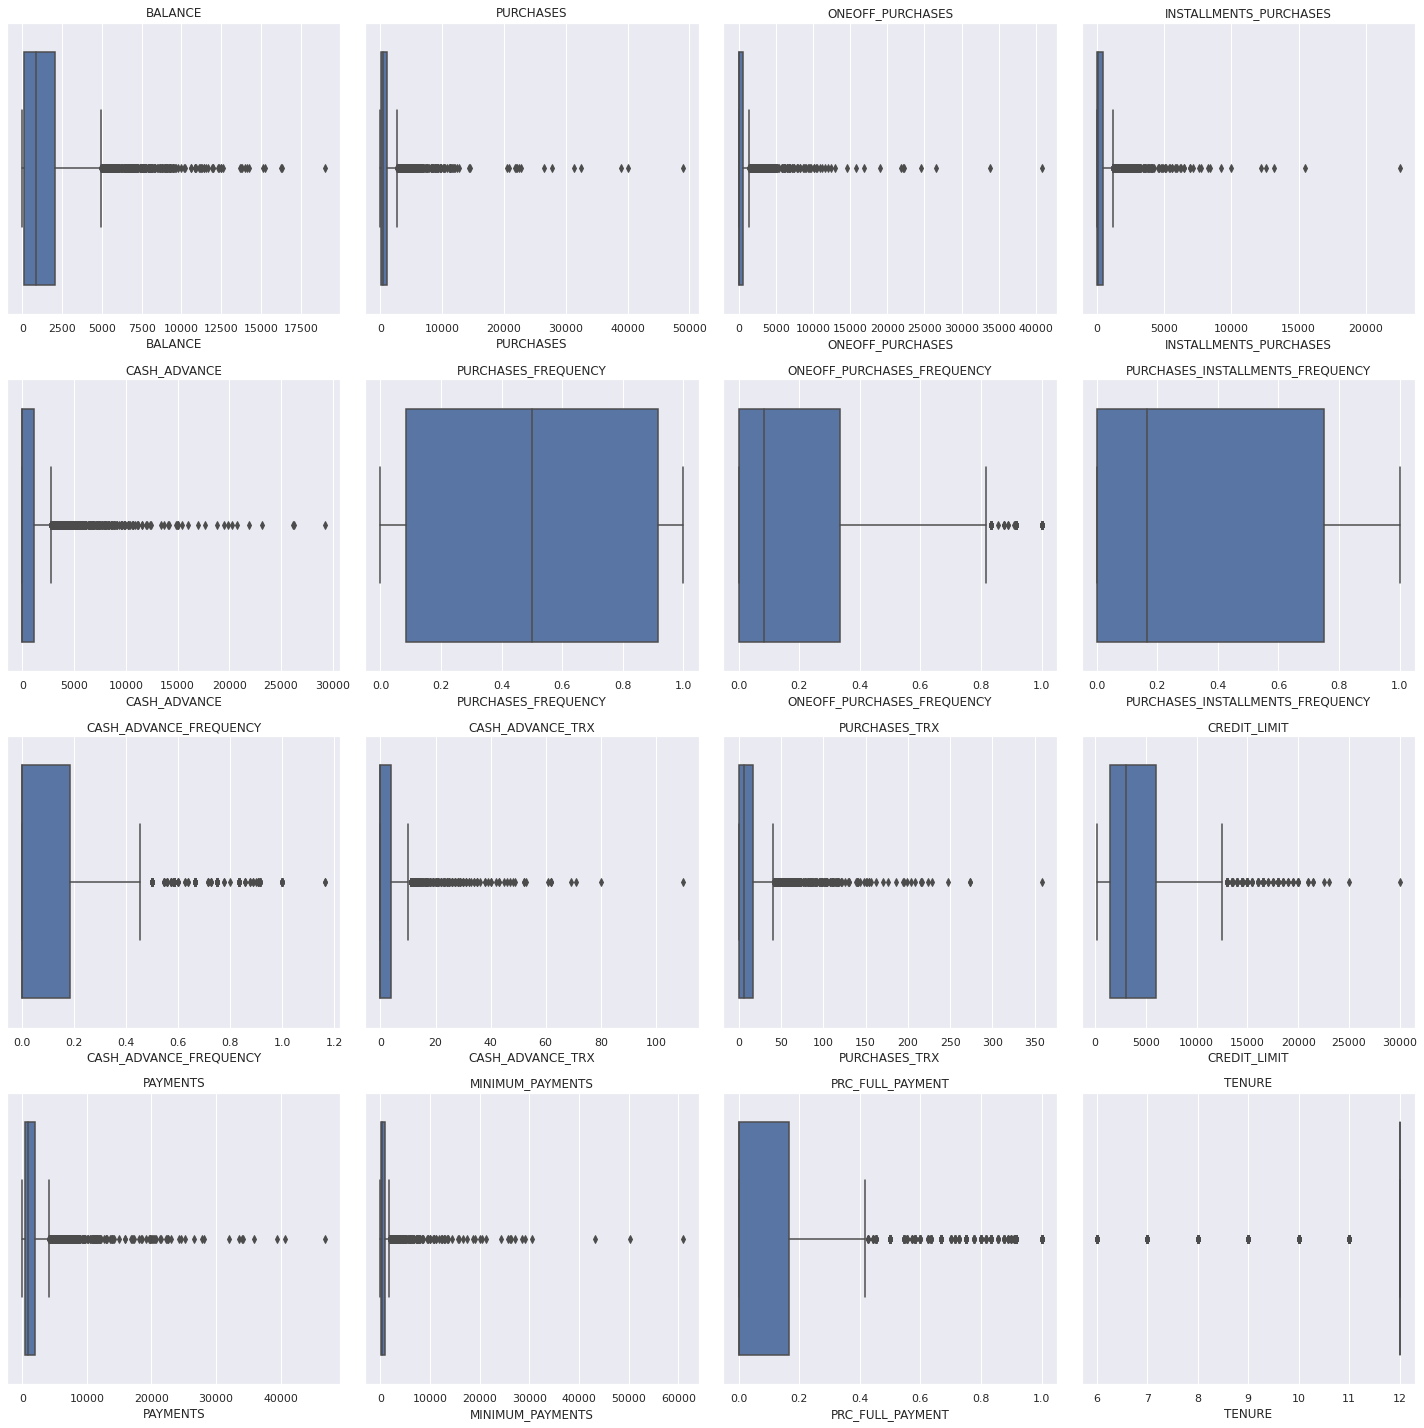

In [85]:
# subset the dataframe to only include numerical columns
num_df = df[n_val]

# create a figure with 4 rows and 4 columns
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20))

# loop through each column and plot a boxplot
for i, col in enumerate(num_df.columns):
    sns.boxplot(ax=axes[i//4,i%4], x=num_df[col])
    axes[i//4,i%4].set_title(col)
    
# adjust spacing between subplots
plt.tight_layout()

# show the plot
plt.show()

**Observation:** 

- There are many extreme outliers in our data
- Especially in the balance and purchases columns. Meaning some people make very big purchases, this can indicate a purchase of luxury items/property/e.t.c

### C. Bivariate Analysis

Let's check the correlation coefficients to see which variables are highly correlated using a heatmap.


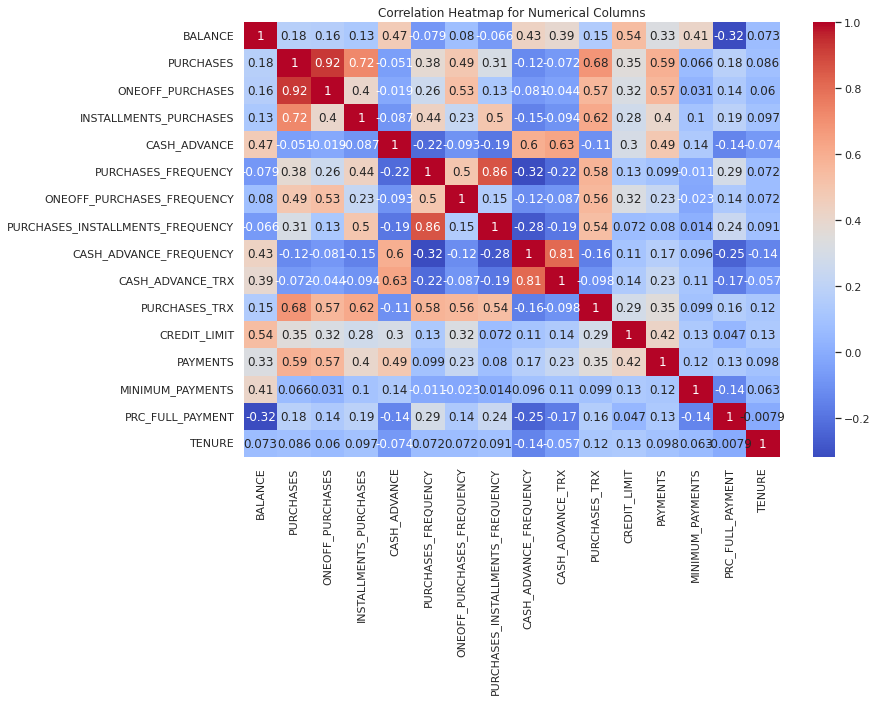

In [14]:

# Create a correlation matrix
corr = df[n_val].corr()

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Create the heatmap with correlation values
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)

# Set the title
ax.set_title('Correlation Heatmap for Numerical Columns')

# Display the plot
plt.show()

**Observation:** 
- There are several highly correlated columns in this dataset
- Purchases and one_off purchases are highly correlated (`0.97`) meaning that people who tend to have a high purchase amount also purchase expensive one off items.
- Purchases and cash advance is also highly correlated `0.72` meaning people with high purchasing power usually take more cash advance.
- purchases_trx is correlated with a lot of other columns in our dataset meaning that number of purchase transactions made usually lead to higher amount of purchase value, more expensive one of purchases and installment purchases and also the frequency of purchases


Now lets see the relationship between some of these columns when plotted in a `scatter plot`.

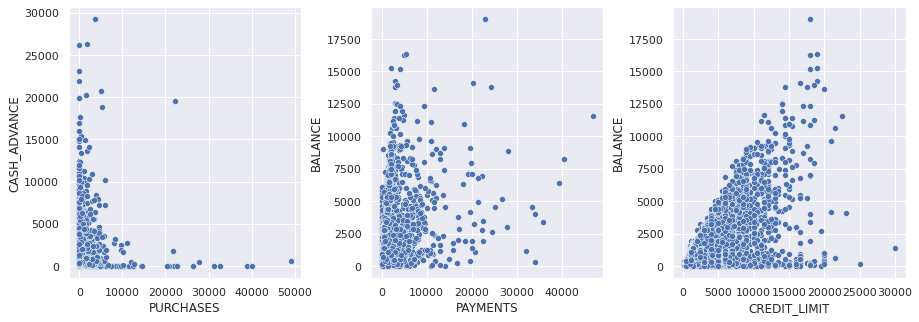

In [86]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(15, 5)

sns.scatterplot(x='PURCHASES', y='CASH_ADVANCE', data=df, ax=axs[0])
sns.scatterplot(x='PAYMENTS', y='BALANCE', data=df, ax=axs[1])
sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=df, ax=axs[2])

plt.subplots_adjust(wspace=0.3)
plt.show()

**Observation:** 
- There is a direct linear relationship for Balance with payments and credit limit, meaning people with bigger payments and credit_limit usually have a higher balance
- Cash advance does not have linear relationship with purchases, most high purchases are made by people with low cash advance


## 5. Data Pre-processing 🐠


Clustering algorithms work by grouping similar data points together into clusters. If the data has too much noise, outliers, or missing values, the clusters may not be meaningful or accurate.

Before we start I want to make sure that all the datatypes are off the same type so that there are no errors when training the model.

### Dealing with different datatypes


In [16]:
df.dtypes

CUST_ID                               int64
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [17]:
df[['CUST_ID', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE']] = df[['CUST_ID', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE']].astype('float64')


### A. Dealing with duplicates

In [18]:
df.duplicated().sum()

0

**Observation:**

There are no duplicates in this dataset

### B. Dealing with Missing values (with MAR/MCAR/MNAR analysis)

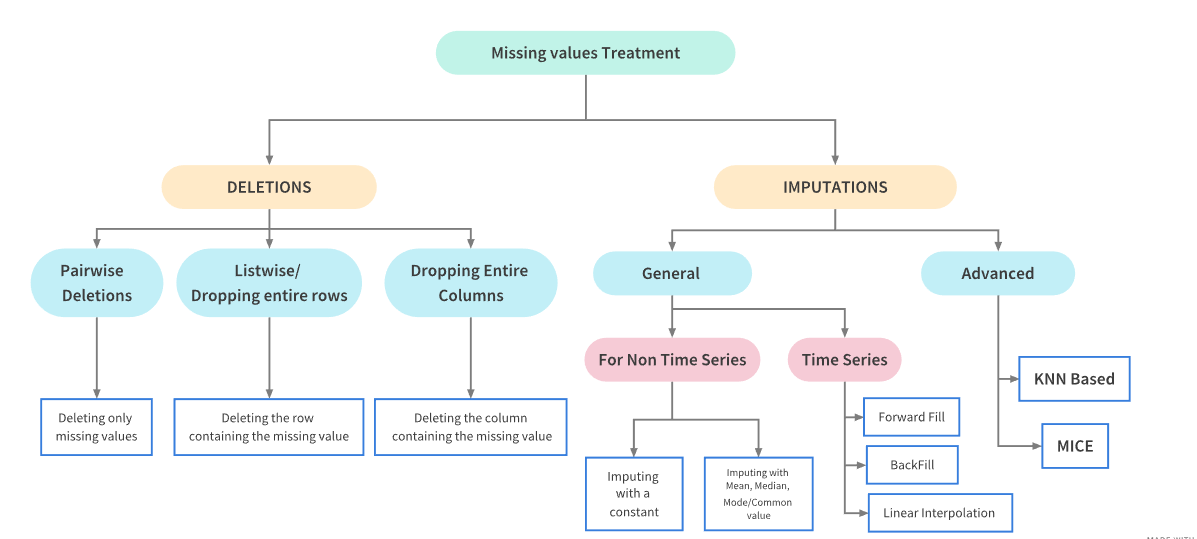

In [19]:
Image('/content/68u0dD2.png')

There could be multiple reasons for the missing values but primarily the reason for missingness can be attributed to:

- Data doesn't exist
- Data not collected due to human error
- Data accidentally deleted

In [20]:
df.isna().sum() 

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**Reason for missing values**

1. Missing Completely at Random (MCAR)

The missing values on a given variable (Y) are not associated with other variables in a given data set or with the variable (Y) itself. In other words, there is no particular reason for the missing values.

2. Missing at Random (MAR)

MAR occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.

3. Missing Not at Random (MNAR)

Missingness depends on unobserved data or the value of the missing data itself.


Source: https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python 

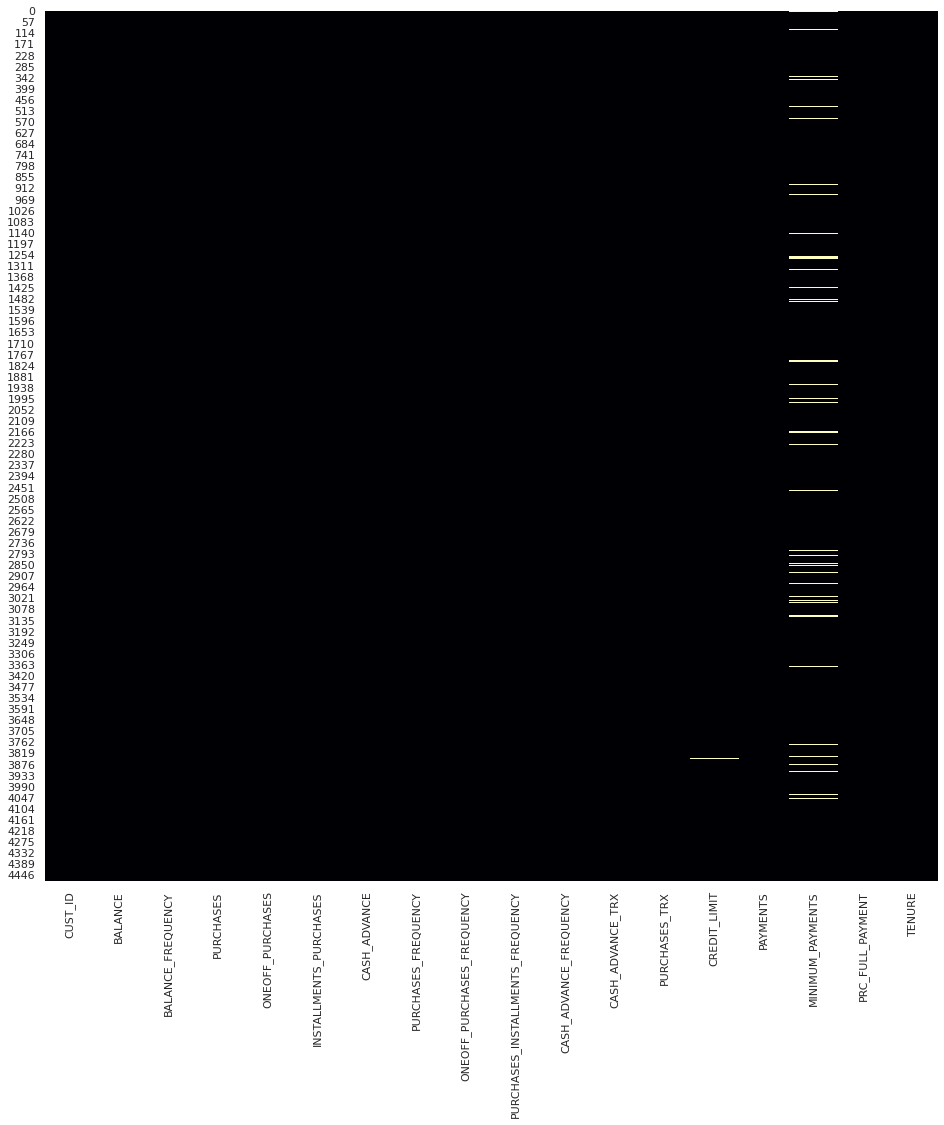

In [21]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);


**Observation:**

The `MINIMUM_PAYMENTS` Column has very few missing values and does not seem to be correlated with any other column like `CRED_LIMIT`.

The missingness in Embarked column can be concluded as `Missing Completely at Random`

Now lets see if we should remove the rows immedeatly or do efforts to impute the value.

In [22]:
# calculate the percentage of empty rows in the DataFrame
empty_rows = df.isna().sum().sum()
total_rows = df.shape[0]
percent_empty_rows = (empty_rows / total_rows) * 100

print(f"Percentage of data with empty rows: {percent_empty_rows:.2f}%")

Percentage of data with empty rows: 3.55%


**Observation:**

As we can see only a small percentage of our data has missing value `<5%`. We will remove the missing values.

In [23]:
# Drop rows with missing values
df = df.dropna()

In [24]:
# calculate the percentage of empty rows in the DataFrame
empty_rows = df.isna().sum().sum()
total_rows = df.shape[0]
percent_empty_rows = (empty_rows / total_rows) * 100

print(f"Percentage of data with empty rows: {percent_empty_rows:.2f}%")

Percentage of data with empty rows: 0.00%


### C. Dealing with Outliers

First i will calculate the skew in order to determine what outlier method to use

In [25]:
outlier_cols = ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

skewness = df[outlier_cols].skew()

print(skewness)

PURCHASES                  8.902272
ONEOFF_PURCHASES          10.045515
INSTALLMENTS_PURCHASES     8.030305
CASH_ADVANCE               4.713175
CASH_ADVANCE_TRX           4.722877
PURCHASES_TRX              4.429897
CREDIT_LIMIT               1.525379
PAYMENTS                   5.987445
MINIMUM_PAYMENTS          12.356758
dtype: float64


Since the distribution is `heavily skewed` I will use `Tukey Method` for outlier removal.

To see the difference in shape before and after removing outliers, i will display the shape.

In [26]:
df.shape

(4316, 18)

In [27]:
# Loop over columns and remove outliers using IQR method
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

To see the difference in shape before and after removing outliers, i will display the shape.

In [28]:
df.shape

(1978, 18)

Now i plot a boxplot to see the distribution after removing outliers.

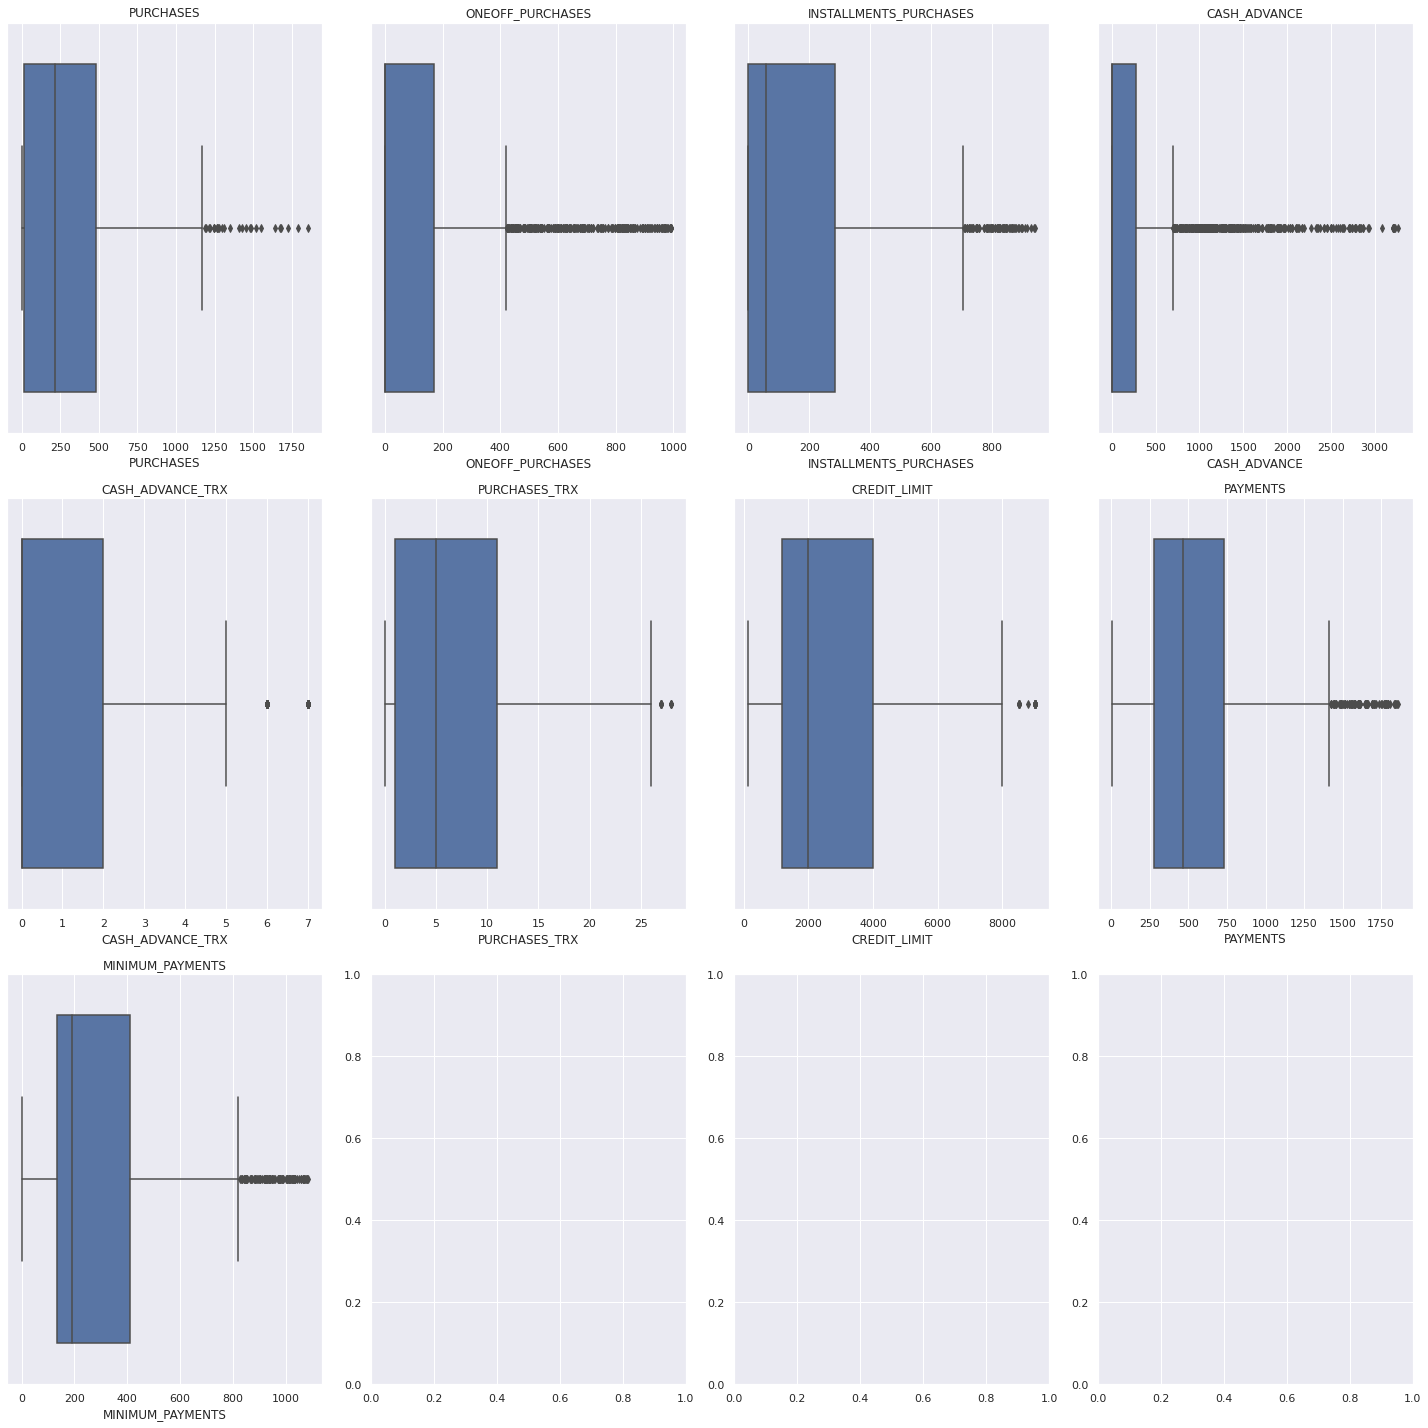

In [29]:
# subset the dataframe to only include numerical columns
num_df = df[outlier_cols]

# create a figure with 4 rows and 4 columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,20))

# loop through each column and plot a boxplot
for i, col in enumerate(num_df.columns):
    sns.boxplot(ax=axes[i//4,i%4], x=num_df[col])
    axes[i//4,i%4].set_title(col)
    
# adjust spacing between subplots
plt.tight_layout()

# show the plot
plt.show()

As we can see there are less outliers in our data. Especially extreme outliers

## 6. Feature Engineering 🔧




### A. Scaling Data

First I will calculate the skew of continous numerical columns to figure out the best scaling method to use. 

In [30]:
scaling_cols = ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

skewness = df[scaling_cols].skew()

print(skewness)

PURCHASES                 1.219334
ONEOFF_PURCHASES          1.933945
INSTALLMENTS_PURCHASES    1.368067
CASH_ADVANCE              2.480242
CASH_ADVANCE_TRX          1.608720
PURCHASES_TRX             1.017015
CREDIT_LIMIT              1.241233
PAYMENTS                  1.187385
MINIMUM_PAYMENTS          1.366321
dtype: float64


**Observation:**

Since the skew values for the columns range from 1 to 2.5, the data is not normally distributed . We will use standardscaler, which scales the data based on the median and interquartile range rather than the mean and standard deviation. So, for this dataset, i will use `StandardScaler`.

In [31]:
# Dropping Country field as scaled columns will only contain numerical columns

df_drop = df.drop('CUST_ID', axis=1)


cust_id = df['CUST_ID'].to_frame()

In [32]:
cust_id.head()

,CUST_ID
1,1902.0
3,3426.0
5,4266.0
9,24.0
10,172.0


Apply the standard scaler

In [33]:
# create an instance of StandardScaler
scaler = StandardScaler()

# fit and transform the data
df_scaled = scaler.fit_transform(df_drop)

In [34]:
df_scaled

array([[ 0.2746274 ,  0.09065046, -0.63195755, ...,  0.46602915,
        -0.54281525, -2.33163203],
       [-0.30467575,  0.60993142,  0.90119753, ..., -0.60281157,
        -0.54281525, -2.33163203],
       [ 1.8290224 ,  0.60993142, -0.57788361, ...,  1.71541281,
        -0.54281525, -2.33163203],
       ...,
       [ 0.28434947,  0.60993142, -0.95958198, ...,  0.17660883,
        -0.54281525, -0.28641334],
       [ 0.77592964,  0.60993142, -0.95958198, ...,  0.6035494 ,
        -0.54281525, -0.28641334],
       [-0.38705339,  0.23227292,  0.47178688, ...,  0.82011282,
        -0.54281525, -0.28641334]])


### B. MULTICOLINEARITY TEST (USING VIF)

I will test VIF MULTICOLINEARITY TEST before doing dimensionality Reduction (PCA)

In [35]:
df_num = df

# Compute VIF scores for each variable
vif_scores = pd.DataFrame()
vif_scores["feature"] = df_num.columns
vif_scores["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(len(df_num.columns))]

# Print the results
print(vif_scores)

                             feature          VIF
0                            CUST_ID     4.008547
1                            BALANCE     9.147607
2                  BALANCE_FREQUENCY    19.080060
3                          PURCHASES  1636.314645
4                   ONEOFF_PURCHASES   647.758945
5             INSTALLMENTS_PURCHASES   673.859137
6                       CASH_ADVANCE     2.597413
7                PURCHASES_FREQUENCY    61.786870
8         ONEOFF_PURCHASES_FREQUENCY    11.596194
9   PURCHASES_INSTALLMENTS_FREQUENCY    52.389877
10            CASH_ADVANCE_FREQUENCY     8.637918
11                  CASH_ADVANCE_TRX     9.219919
12                     PURCHASES_TRX    11.342860
13                      CREDIT_LIMIT     3.827978
14                          PAYMENTS     4.066834
15                  MINIMUM_PAYMENTS    10.154227
16                  PRC_FULL_PAYMENT     1.814318
17                            TENURE    20.638673


**Observation:**

- The PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, and PURCHASES_FREQUENCY features have `very high VIF values`, indicating high multicollinearity. This means that these features are highly correlated with each other and wil be reduced to a smaller set of features using PCA.
- other features has a low VIF value, indicating that it has low correlation with other features.


### C. Dimensionality Reduciton (PCA)

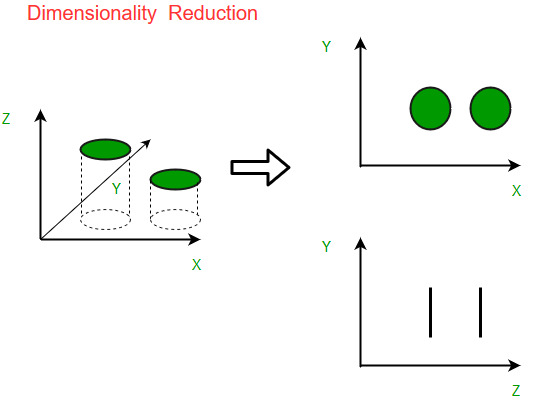

In [36]:
Image('/content/Dimensionality_Reduction_1.jpg')

**What is PCA?**

Principal component analysis (PCA) is one of the most commonly used dimensionality reduction techniques in the industry. By converting large data sets into smaller ones containing fewer variables, it helps in improving model performance, visualising complex data sets, and in many more areas.

Let's use PCA for dimensionality reduction `as from the heatmap it is evident that correlation exists between the attributes`.

In [37]:
pca = PCA(svd_solver='randomized', random_state=50)

Lets apply PCA on the scaled data

In [38]:
pca.fit(df_scaled)

PCA(random_state=50, svd_solver='randomized')

In [39]:
# PCA components created 

pca.components_

array([[ 2.52729716e-01,  3.71808836e-02, -3.06688531e-01,
        -1.08102975e-01, -3.15588685e-01,  2.65487098e-01,
        -3.69802051e-01, -1.08404242e-01, -3.30932731e-01,
         3.12388242e-01,  3.08855400e-01, -3.48896072e-01,
        -4.57693792e-02, -1.12061981e-02,  1.94972156e-01,
        -2.13508060e-01, -1.93196662e-02],
       [ 3.55032622e-01,  3.34315605e-01,  3.20577400e-01,
         3.26540847e-01,  1.03354273e-01,  1.73583026e-01,
         1.45098508e-01,  3.08566446e-01,  3.35155736e-02,
         1.70401074e-01,  1.83614849e-01,  2.43380381e-01,
         1.71850843e-01,  2.88758961e-01,  3.55509542e-01,
        -1.61945062e-01,  8.40844130e-02],
       [-1.25453004e-01, -2.40171292e-01,  1.17555046e-01,
         4.69433849e-01, -3.34418749e-01, -1.54831699e-01,
        -2.07860104e-01,  4.31475192e-01, -4.12551436e-01,
        -1.71952581e-01, -1.85499423e-01, -1.23386475e-01,
         2.10167626e-01,  4.54609862e-02, -1.67654281e-01,
        -3.76200284e-02,  4.5

In [40]:
# Variance Ratio

pca.explained_variance_ratio_

array([3.06024319e-01, 1.69123127e-01, 1.21911988e-01, 8.35842082e-02,
       7.10929767e-02, 5.17107050e-02, 4.28120098e-02, 3.88128852e-02,
       3.12597870e-02, 2.82558195e-02, 2.09407458e-02, 1.42662019e-02,
       7.76678233e-03, 6.77570086e-03, 4.70787509e-03, 9.21664737e-04,
       3.32038236e-05])

**Finding Optimal PCA Components**

To see the variance ratio that is contributed by each pca components we will plot 2 different graphs

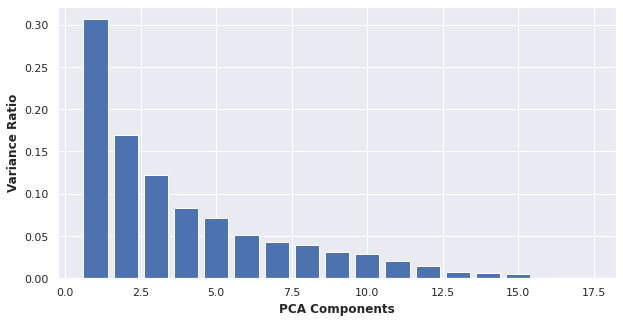

In [41]:
# Variance Ratio bar plot for each PCA components.
plt.figure(figsize = (10, 5))
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

plt.show()

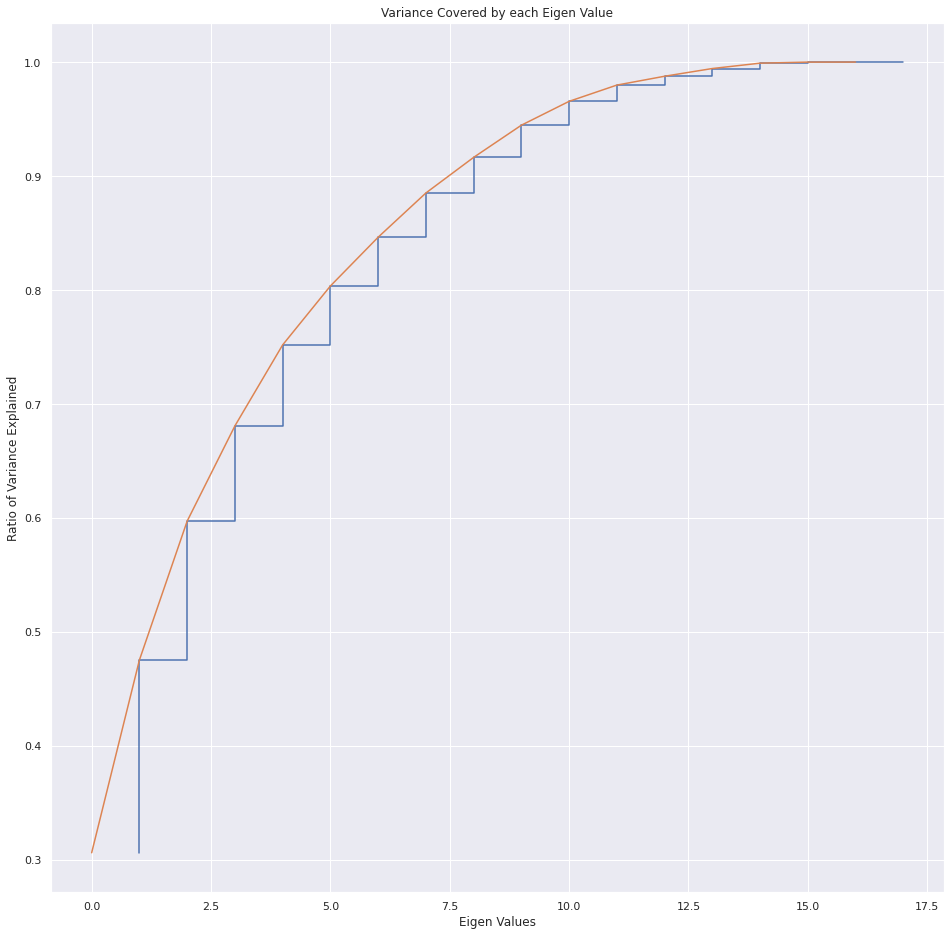

In [42]:
plt.step(list(range(1,18)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

**Graph Definition:**

- This is a very effective method where we add up the variances of all the features in cummulative format.
- Typically eigen values with more than 95% of ratio of variance are selected.
- They correspond to the columns of the PCA generated dataframe.

**Observation:**

- Based on the observation from the two graphs, we `select the Eigen Value : 9` as the steps generated have significant variances and thus the other features get dominated by their variances.

Checking which attributes are well explained by the pca components

In [43]:
org_col = list(df.drop(['CUST_ID'],axis=1).columns)

attributes_pca = pd.DataFrame({'Attribute':org_col,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2],'PC_4':pca.components_[3],'PC_5':pca.components_[4],'PC_6':pca.components_[5],'PC_7':pca.components_[6],'PC_8':pca.components_[7],'PC_9':pca.components_[8]})

In [44]:
attributes_pca

,Attribute,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9
0,BALANCE,0.252730,0.355033,-0.125453,-0.248290,-0.077473,0.215697,0.237837,0.075687,0.205567
1,BALANCE_FREQUENCY,0.037181,0.334316,-0.240171,-0.135994,-0.375184,-0.001722,-0.126642,0.301369,-0.691418
2,PURCHASES,-0.306689,0.320577,0.117555,0.163984,0.067461,-0.090700,0.132606,-0.170659,0.033375
3,ONEOFF_PURCHASES,-0.108103,0.326541,0.469434,0.191124,-0.097874,-0.093059,0.047515,-0.042434,0.078990
4,INSTALLMENTS_PURCHASES,-0.315589,0.103354,-0.334419,0.026990,0.198842,-0.029187,0.134043,-0.195937,-0.034964
5,CASH_ADVANCE,0.265487,0.173583,-0.154832,0.300360,0.250273,0.191170,-0.107528,-0.158244,0.143145
6,PURCHASES_FREQUENCY,-0.369802,0.145099,-0.207860,0.089854,-0.128939,0.079841,-0.126611,0.048154,0.110815
7,ONEOFF_PURCHASES_FREQUENCY,-0.108404,0.308566,0.431475,0.150204,-0.197338,-0.009171,-0.172236,0.225524,0.089675
8,PURCHASES_INSTALLMENTS_FREQUENCY,-0.330933,0.033516,-0.412551,0.010557,-0.023835,0.052513,-0.071496,-0.090310,0.074728
9,CASH_ADVANCE_FREQUENCY,0.312388,0.170401,-0.171953,0.361004,0.080675,-0.109339,-0.235417,0.044167,-0.036858


Since 95% variance is explained by 9 principal components, lets build the dataframe using those 9 components only.

In [47]:
# Building the dataframe using Incremental PCA for better efficiency.

inc_pca = IncrementalPCA(n_components=9)

In [48]:
# Fitting the scaled df on incremental pca

df_inc_pca = inc_pca.fit_transform(df_scaled)
df_inc_pca

array([[-1.14960826, -1.16493574,  0.62942288, ..., -1.76211794,
         0.11220448,  0.00524837],
       [-0.12144735, -0.39546725,  1.89816064, ..., -1.6110656 ,
        -0.31259113,  1.51063042],
       [-1.7401204 ,  0.27362287,  0.2940936 , ..., -2.336708  ,
         0.50756309, -0.03195794],
       ...,
       [-3.19611837, -0.44408421, -0.74347649, ...,  0.63569826,
         0.03069725,  0.46502657],
       [-3.62136364,  0.12036305, -0.97705928, ...,  0.62681085,
         0.28308597,  0.49347181],
       [-0.8640695 ,  2.79528665,  1.41503583, ...,  0.97276963,
         0.86691924, -1.51082184]])

Creating new dataframe with Principal components

In [49]:
# Creating new dataframe with Principal components

df_pca = pd.DataFrame(df_inc_pca, columns=["PC_1", "PC_2","PC_3","PC_4","PC_5","PC_6","PC_7","PC_8","PC_9"])

Making sure our indexses are aligned before we combine the cust_id with our pca values.

In [50]:
if not cust_id.index.equals(df_pca.index):
    print("Indices are not aligned!")


Indices are not aligned!


In [51]:
cust_id.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)

In [52]:
df_pca_final = pd.concat([cust_id, df_pca], axis=1)

#for modelling
df_pca_final_data = df_pca_final.drop(['CUST_ID'],axis=1)

df_pca_final.head()

,CUST_ID,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9
0,1902.0,-1.149608,-1.164936,0.629423,-0.394195,-2.056200,0.876646,-1.762118,0.112204,0.005248
1,3426.0,-0.121447,-0.395467,1.898161,-1.424489,-2.130862,0.311224,-1.611066,-0.312591,1.510630
2,4266.0,-1.740120,0.273623,0.294094,0.604399,-2.039710,1.751715,-2.336708,0.507563,-0.031958
3,24.0,-0.026135,-2.594125,0.777467,0.588667,-0.282221,0.017438,0.623668,-0.945672,-0.196247
4,172.0,-0.544114,-0.176448,0.115533,1.339731,0.765952,-0.482324,-0.763006,-0.131289,-0.172739


In [53]:
df_pca_final_data.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9
0,-1.149608,-1.164936,0.629423,-0.394195,-2.056200,0.876646,-1.762118,0.112204,0.005248
1,-0.121447,-0.395467,1.898161,-1.424489,-2.130862,0.311224,-1.611066,-0.312591,1.510630
2,-1.740120,0.273623,0.294094,0.604399,-2.039710,1.751715,-2.336708,0.507563,-0.031958
3,-0.026135,-2.594125,0.777467,0.588667,-0.282221,0.017438,0.623668,-0.945672,-0.196247
4,-0.544114,-0.176448,0.115533,1.339731,0.765952,-0.482324,-0.763006,-0.131289,-0.172739


Plotting Heatmap to check is there still dependency in the dataset.

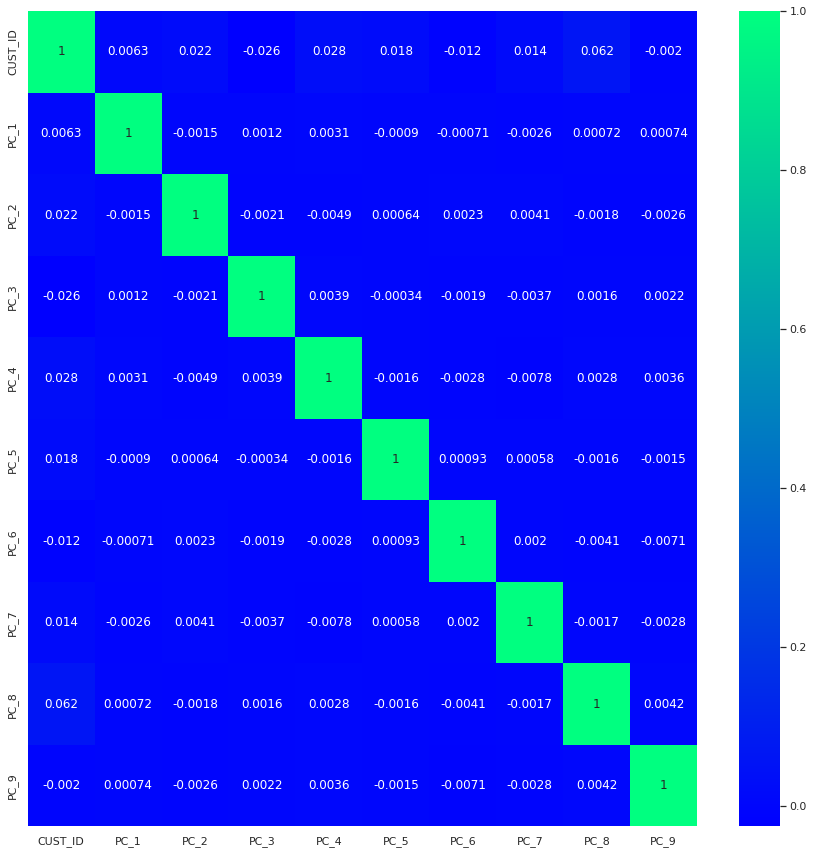

In [54]:
plt.figure(figsize = (15,15))        
ax = sns.heatmap(df_pca_final.corr(),annot = True,cmap='winter')

Since all the values are close to 0 we can safely assume that there are no more dependencies

## 7. Model Definition 🎯

###A. Model Assumptions

K-means algorithm makes the following assumptions about the data it is going to use:

1. The clusters are spherical and equally sized.
2. The distance between the data points within a cluster should be as small as possible.
3. The distance between the clusters should be as large as possible.

  **Our Action:**
We will do this when evaluating the model, see model metrics below. ✅

4. The data should not have too many outliers.  

  **Our Action:** Removed outliers using IQR method  ✅
  
5. The data should be standardized or normalized to have the same scale.

  **Our Action:** Scaled data using Standard Scaler  ✅


### B. Model Evaluation Metrics

  -  Visual inspection of data: We can plot the data and visually inspect whether the clusters are well-separated or overlapping. 

  - Silhouette analysis: Silhouette analysis is a method to evaluate the quality of clustering. It measures how well each data point fits into its assigned cluster based on the distance from the point to its own cluster and to other neighboring clusters. A silhouette score of 1 indicates that the point is very well matched to its own cluster, while a score of -1 indicates that the point is probably assigned to the wrong cluster. 

  - Davies-Bouldin index: This index measures the average similarity between each cluster and its most similar cluster, compared to the average dissimilarity between each cluster and its least similar cluster. A lower index value indicates better separation between clusters. 

###C. Model Definition

**K-Means Algorithm:**
K-means is a type of machine learning algorithm that helps to organize data into groups. The algorithm uses a pre-defined number of groups, and it works by repeatedly putting each data point into the group with the closest center point, and then updating the center points of each group based on the new data. This process continues until the center points no longer move or a maximum number of attempts is reached. 

**The steps of the k-means algorithm are :**

- Randomly select K centroids from the data as the initial cluster centers.
Assign each data point to its closest centroid.
- Calculate the new centroid for each cluster based on the mean of all the data points assigned to it.
- Repeat steps 2 and 3 until the centroids no longer move or a maximum number of iterations is reached.

**The K-means algorithm has the following inputs:**

- K: the number of clusters to form
- Data: the dataset to cluster

## 8. Model Training and Evaluation

### 1. Finding the Optimal Number of Clusters

**A. Elbow Curve**

The Elbow Method is one of the most popular methods to determine this optimal value of k.

1. First, you need to calculate the sum of squared distances (SSD) for different values of k (number of clusters). This can be done using the KMeans class from the sklearn.cluster module.

2. In the above code, we iterate over different values of k (1 to 10) and calculate the SSD for each value using the inertia_ attribute of the KMeans class. The random_state parameter is set to ensure reproducibility of results.

In [55]:
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_final_data)
    ssd.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

3. Next, i plot the SSD against the number of clusters and identify the "elbow point", i.e., the point where the SSD starts decreasing at a slower rate. This is the optimal number of clusters.

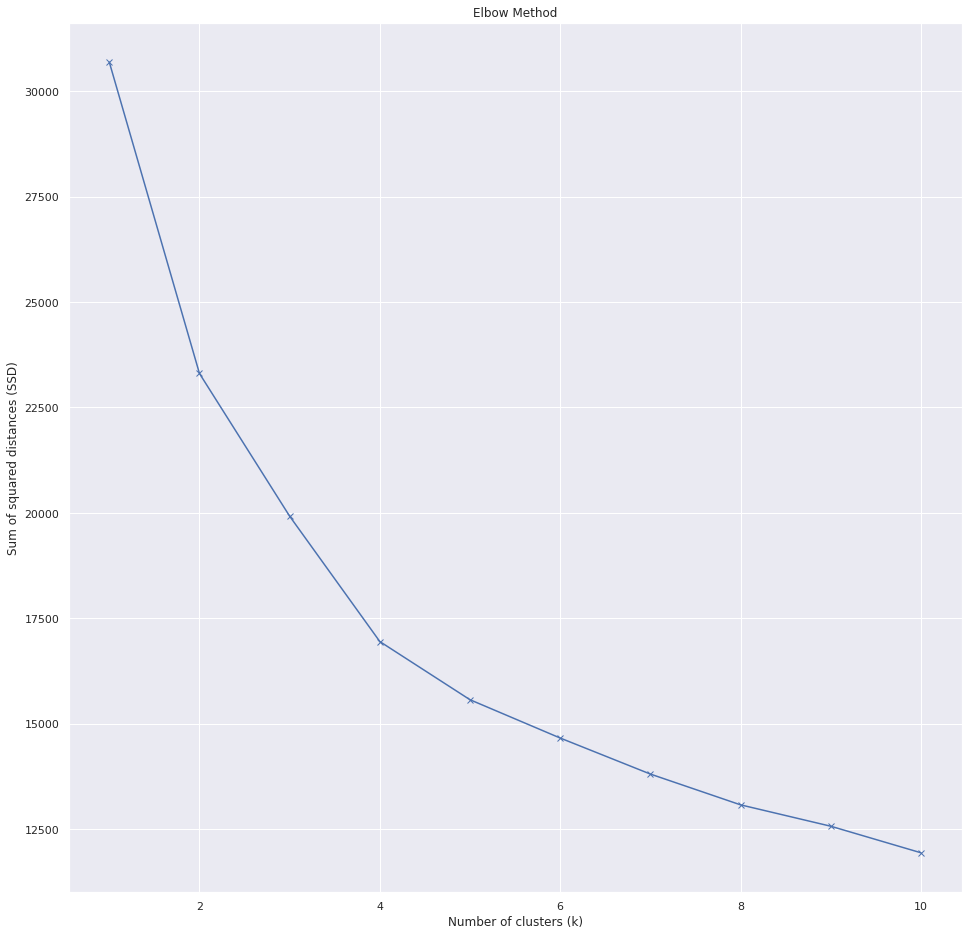

In [56]:
plt.plot(range(1, 11), ssd, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method')
plt.show()

**Observation:**

As you can see the elbow is at 4 number of clusters.

**B. Silhouette score analysis to find the ideal number of clusters for K-means clustering**

In [60]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df_pca_final_data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pca_final_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.2335660715992439


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, the silhouette score is 0.19120326359815032


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, the silhouette score is 0.21552248586222866


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the silhouette score is 0.20127783458268156


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is 0.20773647946150903


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, the silhouette score is 0.2023368114747712


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the silhouette score is 0.19916682043135667


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=9, the silhouette score is 0.18587781283216953


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=10, the silhouette score is 0.18788943214481768


**Observation:**

From the results of the above 2 methods (silhhoutte and elbow method), we select :
`k : Clusters = 4`

### 2. Fitting the Model

In [61]:
#K-means with k=4 clusters

cluster4 = KMeans(n_clusters=4, max_iter=150, random_state= 50)
cluster4.fit(df_pca_final_data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=150, n_clusters=4, random_state=50)

In [62]:
# Cluster labels

cluster4.labels_

array([2, 2, 0, ..., 0, 0, 3], dtype=int32)

In [63]:
print(len(df_pca_final))
print(len(cluster4.labels_))


1978
1978


In [64]:
# Assign the label

df_pca_final['Cluster_Id4'] = cluster4.labels_
df_pca_final.head()

,CUST_ID,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,Cluster_Id4
0,1902.0,-1.149608,-1.164936,0.629423,-0.394195,-2.056200,0.876646,-1.762118,0.112204,0.005248,2
1,3426.0,-0.121447,-0.395467,1.898161,-1.424489,-2.130862,0.311224,-1.611066,-0.312591,1.510630,2
2,4266.0,-1.740120,0.273623,0.294094,0.604399,-2.039710,1.751715,-2.336708,0.507563,-0.031958,0
3,24.0,-0.026135,-2.594125,0.777467,0.588667,-0.282221,0.017438,0.623668,-0.945672,-0.196247,2
4,172.0,-0.544114,-0.176448,0.115533,1.339731,0.765952,-0.482324,-0.763006,-0.131289,-0.172739,2


In [66]:
# Number of countries in each cluster

df_pca_final['Cluster_Id4'].value_counts()

1    580
2    567
0    557
3    274
Name: Cluster_Id4, dtype: int64

### 3. Visualizing the clusters

It seems that the customers are equally divided between the 4 clusters. Now lets plot our clusters.

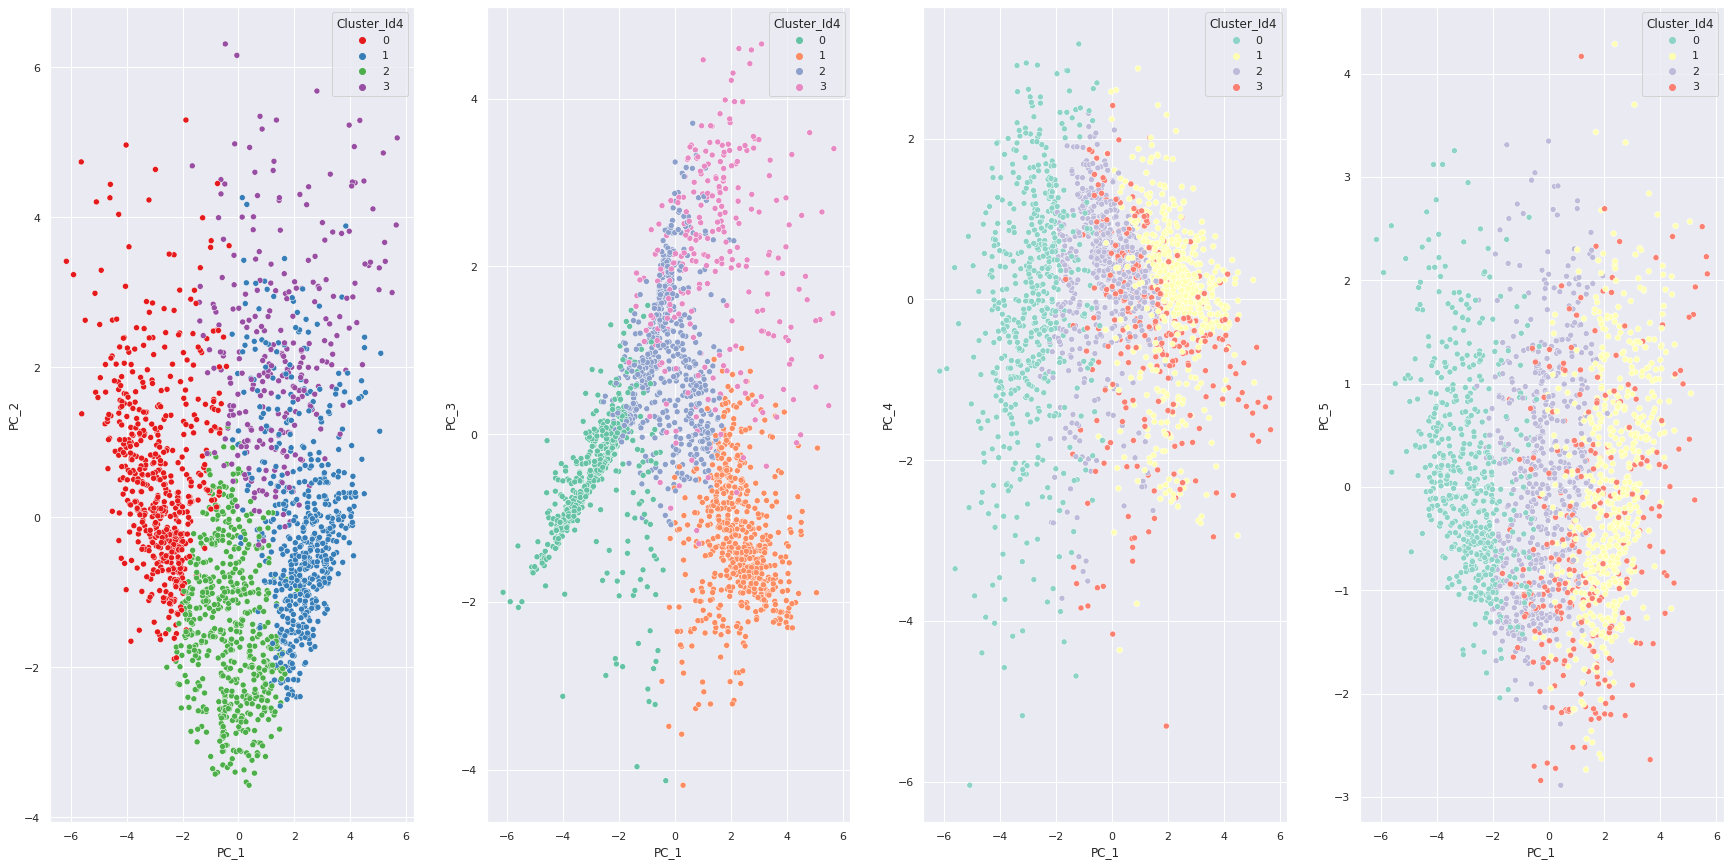

In [91]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,4, figsize=(30,15))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id4',legend='full',palette="Set1",data=df_pca_final,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id4',legend='full',palette="Set2",data=df_pca_final,ax=axes[1])
sns.scatterplot(x='PC_1',y='PC_4',hue='Cluster_Id4',legend='full',palette="Set3",data=df_pca_final,ax=axes[2])
sns.scatterplot(x='PC_1',y='PC_5',hue='Cluster_Id4',legend='full',palette="Set3",data=df_pca_final,ax=axes[3])
plt.show()

We can see that there are 4 good clusters and they points are not far away from each other.

### 4. Characteristics of the clusters

The merge() function is used to `join df `with the `cluster column` on the `CUST_ID column`. The how='left' parameter specifies a left join

In [69]:
df_merged = df.merge(df_pca_final[['CUST_ID', 'Cluster_Id4']], on='CUST_ID', how='left')

In [70]:
df_merged.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_Id4
0,1902.0,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,1000.0,215.325023,410.484825,0.0,8.0,2
1,3426.0,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,1000.0,258.032630,151.696433,0.0,8.0,2
2,4266.0,2237.238086,1.000,120.0,120.0,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,2500.0,343.102984,712.986387,0.0,8.0,0


Viewing the characteristics of our clusters

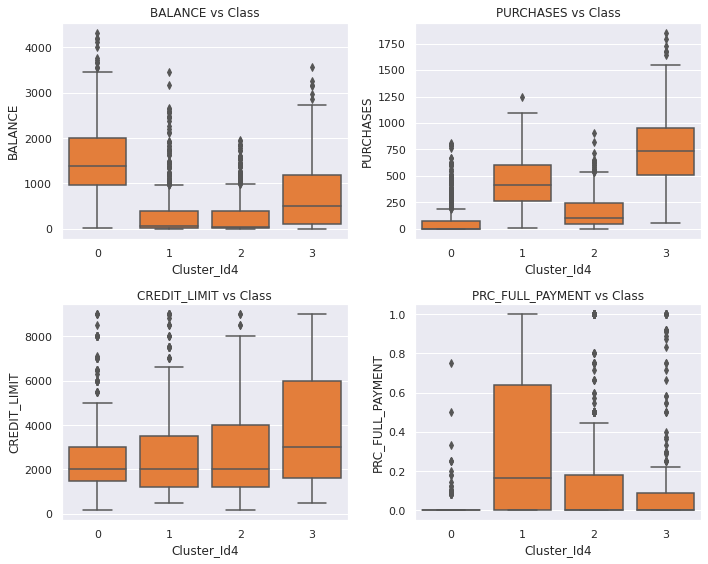

In [77]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(x='Cluster_Id4', y='BALANCE', data=df_merged, color='#FF781F', ax=axs[0, 0])
axs[0, 0].set_title('BALANCE vs Class')

sns.boxplot(x='Cluster_Id4', y='PURCHASES', data=df_merged, color='#FF781F', ax=axs[0, 1])
axs[0, 1].set_title('PURCHASES vs Class')

sns.boxplot(x='Cluster_Id4', y='CREDIT_LIMIT', data=df_merged, color='#FF781F', ax=axs[1, 0])
axs[1, 0].set_title('CREDIT_LIMIT vs Class')

sns.boxplot(x='Cluster_Id4', y='PRC_FULL_PAYMENT', data=df_merged, color='#FF781F', ax=axs[1, 1])
axs[1, 1].set_title('PRC_FULL_PAYMENT vs Class')

plt.tight_layout()
plt.show()

Seeing the central tendency values of our clusters

In [82]:
import pandas as pd
import numpy as np

# Group the data by cluster and compute the central tendency for each variable
centrality = df_merged.groupby('Cluster_Id4')[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT']].agg(['mean', 'median', 'std', 'skew', 
                                                                                                              lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75),
                                                                                                              lambda x: np.max(x) - np.min(x)])

# Rename the columns for better readability
centrality.columns = [f'{var}_{agg}' for var, agg in centrality.columns]

# Print the resulting table
print(centrality)


             BALANCE_mean  BALANCE_median  BALANCE_std  BALANCE_skew  \
Cluster_Id4                                                            
0             1514.379599     1375.427868   818.692326      0.669688   
1              343.308215       67.085352   566.974412      2.322766   
2              287.511434       51.759686   435.225587      1.738933   
3              761.569202      506.235276   774.576291      1.228672   

             BALANCE_<lambda_0>  BALANCE_<lambda_1>  BALANCE_<lambda_2>  \
Cluster_Id4                                                               
0                    974.749857         1994.694769         4300.420640   
1                     28.849557          402.512442         3441.516174   
2                     12.855665          404.252974         1957.712033   
3                    112.229993         1188.936922         3562.532613   

             PURCHASES_mean  PURCHASES_median  PURCHASES_std  ...  \
Cluster_Id4                                    

Observation done in overall analysis

##9. Overall Analysis

### 1. K-means Clustering
A. Strengths: 💪
-  K-means is computationally efficient and scales well to large datasets.
- It is relatively simple to implement and interpret, and can be used for a wide range of applications.
- K-means can be used to identify natural clusters in the data, which can provide insights into the underlying structure of the data.


B. Weaknesses: 🔰
- K-means requires the user to specify the number of clusters, which can be difficult if the number of clusters is not known a priori.
- K-means can be sensitive to the initial placement of the centroids, which can lead to different clusterings depending on the initial conditions.
- K-means assumes that the clusters are spherical and have equal variance, which may not be true in practice.
---
### 2.Cluster Analysis ⭕
1. Cluster 1:

- Has the highest average balance compared to other clusters.
- Majority of customers have zero purchases and cash advances.
- Has the lowest credit limit compared to other clusters.
- Has the lowest percentage of full payments compared to other clusters.
- Most customers have made no payments or very little payments.
2. Cluster 2:

- Has the lowest average balance compared to other clusters.
- Majority of customers have made purchases and cash advances.
- Has a moderate credit limit compared to other clusters.
- Has the highest percentage of full payments compared to other clusters.
- Most customers have made full payments or close to full payments.
3. Cluster 3:

- Has a low average balance compared to other clusters.
- Majority of customers have made purchases and cash advances.
- Has a high credit limit compared to other clusters.
- Has a moderate percentage of full payments compared to other clusters.
- Most customers have made some payments but not necessarily full payments.
4. Cluster 4:

- Has a moderate average balance compared to other clusters.
- Majority of customers have made purchases and cash advances.
- Has a high credit limit compared to other clusters.
- Has a moderate percentage of full payments compared to other clusters.
- Most customers have made some payments but not necessarily full payments.
---
### 3.Business Analysist and Conclusion 👥

In summary, 
- `Cluster 1` appears to have the `highest risk customers` who have low credit limits, high balances, and low payment percentages. 

Business action: This cluster may represent customers who have a high capacity for credit, but do not use it to make purchases. One potential action could be to offer targeted promotions or incentives to encourage these customers to make more purchases using their credit. ✅

- `Cluster 2` appears to have the `lowest risk customers` who have made full payments and have moderate credit limits. 

Business action: This cluster may represent customers who have a lower capacity for credit, but make a lot of purchases. One potential action could be to offer credit increases or other financial products to help these customers better manage their spending and improve their credit capacity. ✅

- `Clusters 3 and 4` appear to have `moderate risk customers` who have made some payments but not necessarily full payments and have moderate to high credit limits.

Business action (3): This cluster may represent a group of customers who are relatively stable in their spending habits. One potential action could be to offer rewards or loyalty programs to encourage these customers to continue making purchases and stay engaged with the brand. ✅

Business action(4): This cluster may represent the most valuable customers in terms of revenue generation. One potential action could be to offer exclusive perks or benefits to incentivize these customers to continue making high-value purchases and to retain their loyalty to the brand. ✅



---
### 4.Further Improvement 📈

- Using a different initialization method, such as k-means++ or hierarchical clustering, can reduce the sensitivity to initial conditions.
- Using a different distance metric, such as the Mahalanobis distance or a kernel-based distance, can allow for more flexible cluster shapes.
- Using an ensemble of multiple clustering algorithms, such as clustering with different values of k or using different clustering algorithms altogether, can improve the robustness of the clustering results.

##10. Saving Model

In [92]:
# Save the file
with open('k-means.pkl','wb') as file_1:
  joblib.dump(cluster4, file_1)

with open('standard_scaler.pkl','wb') as file_2:
  joblib.dump(scaler, file_2)

with open('inc_pca.pkl','wb') as file_2:
  joblib.dump(inc_pca, file_2)

## 11. Conceptual Problems ❓

Jawab pertanyaan berikut:

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

### 1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

- Inertia measures the sum of distances between each data point and its assigned cluster center.
- The objective of K-Means algorithm is to minimize the inertia value.
- As the number of clusters (K) increases, the inertia value decreases.
- Inertia is sensitive to the initial placement of cluster centers, so it is recommended to run the K-Means algorithm multiple times with different initializations and choose the clustering with the lowest inertia value.
- Inertia can be used to determine the optimal number of clusters by plotting the inertia values against the number of clusters and looking for an "elbow point" where the rate of decrease in inertia slows down.

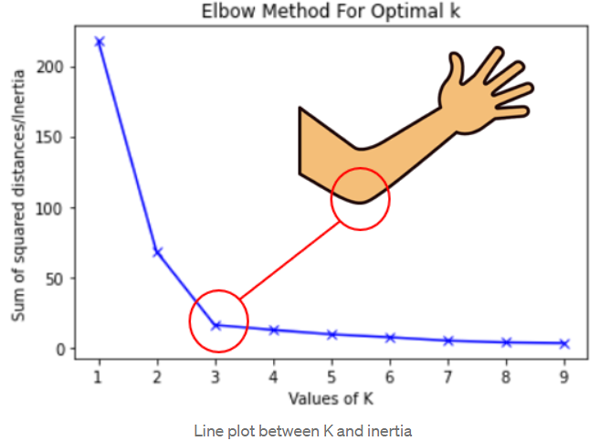

In [78]:
Image('/content/62725cluster0.png')

### 2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

**Definition and usecase**

- The Elbow Method is used to `determine the appropriate number of clusters to use in K-Means clustering.` It works by plotting the `within-cluster sum of squares (WCSS)` against the number of clusters used and `looking for the "elbow" point` on the graph where adding more clusters no longer significantly reduces the WCSS.

- The WCSS is calculated as the `sum of the squared distances between each point and the centroid of its assigned cluster`. The objective of K-Means clustering is to minimize the WCSS.

**Advantages**

- The Elbow Method is useful because it helps to avoid overfitting or underfitting the data when using K-Means clustering. 
- Choosing too many clusters may result in overfitting, while choosing too few clusters may result in underfitting.

**Disadvantages**

- One potential weakness of the Elbow Method is that it relies on visual interpretation, which can be subjective. 
- Additionally, the elbow point may not always be well-defined or obvious, especially in more complex datasets.

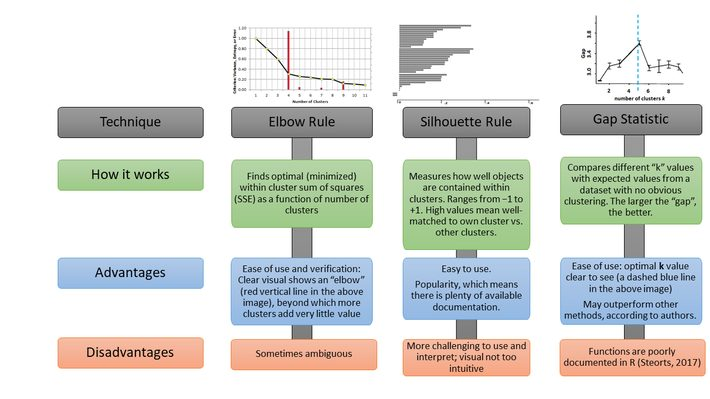

In [79]:
Image('/content/2222699707.jpg')

## External Learning Resource and Reference


1. Handling missing value:

- https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python
- https://www.youtube.com/watch?v=P_iMSYQnqac&ab_channel=KrishNaik

2. Conceptual problems
- https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/
- https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/
- https://www.datasciencecentral.com/determining-number-of-clusters-in-one-picture/ 

Note: Kak Irfan saya sengaja attach image tentang data cleaning, dll supaya kedepannya ketika sedang review gc2 sebelumnya, notebook ini lebih gampang dimengerti
